## Повнозв'язні мережі (багатошаровий персептрон)

In [1]:
import pandas as pd
import numpy as np

# Імпортуємо дані
data = pd.read_csv('SleepStudyData.csv')
data['Enough'] = data['Enough'].map({'Yes': 1, 'No': 0})
data['PhoneReach'] = data['PhoneReach'].map({'Yes': 1, 'No': 0})
data['PhoneTime'] = data['PhoneTime'].map({'Yes': 1, 'No': 0})
data['Breakfast'] = data['Breakfast'].map({'Yes': 1, 'No': 0})
data = data.fillna(data.mean())
features = list(data.columns[1:6])
X = data[features]
data.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,1,8,1,1,3,1
1,0,6,1,1,3,0
2,1,6,1,1,2,1
3,0,7,1,1,4,0
4,0,7,1,1,2,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Розбиваємо вибірку на трейн та тест
allX = data.iloc[0:None, 1:6]
allY = data.iloc[0:None, 0]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(allX, allY, test_size=0.2)
# Масштабуємо дані
scaler = preprocessing.MinMaxScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain.values))
Xtest = pd.DataFrame(scaler.transform(Xtest.values))

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Будуємо модель
model = Sequential([Dense(25, input_dim=5, activation='relu'),
                    Dense(15, activation='relu'),
                    Dense(1, activation='sigmoid')])
model.summary()
# Компілюємо побудовану модель
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Тренеруємо модель
model.fit(Xtrain, Ytrain, epochs=77)
# Оцінюємо точність на тестовій виборці
loss, accuracy = model.evaluate(Xtest, Ytest)
print('Точніть: %.2f' % (accuracy*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 556
Trainable params: 556
Non-trainable params: 0
_________________________________________________________________
Epoch 1/77
23/23 [==============================] - 0s 589us/step - loss: 0.7551 - accuracy: 0.3441
Epoch 2/77
23/23 [==============================] - 0s 642us/step - loss: 0.6739 - accuracy: 0.6888
Epoch 3/77
23/23 [==============================] - 0s 589us/step - loss: 0.6441 - accuracy: 0.7171
Epoch 4/77
23/23 [==============================] - 0s 588us/step - loss: 0.6124 - accur

## Згорткові мережі

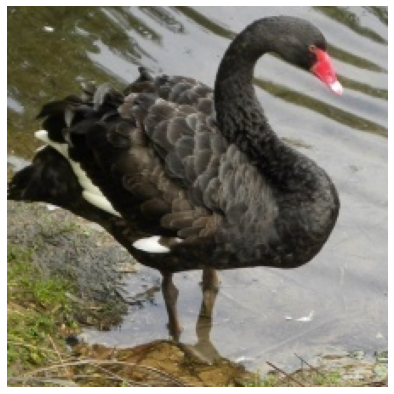

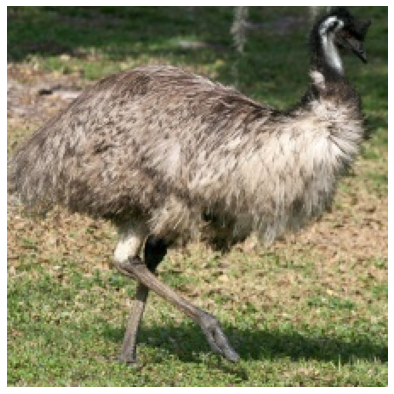

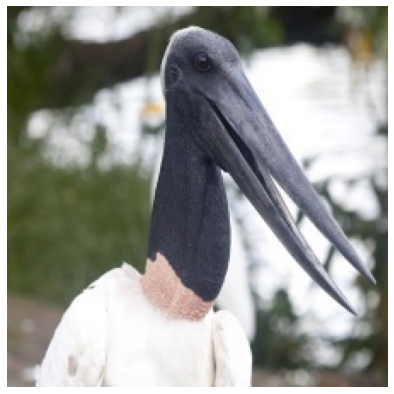

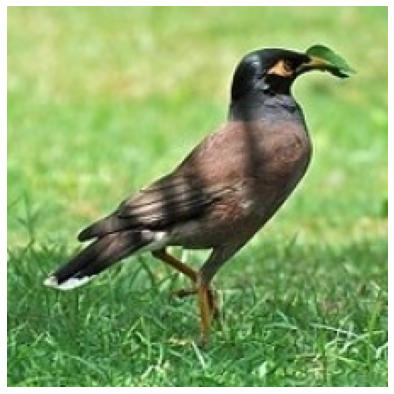

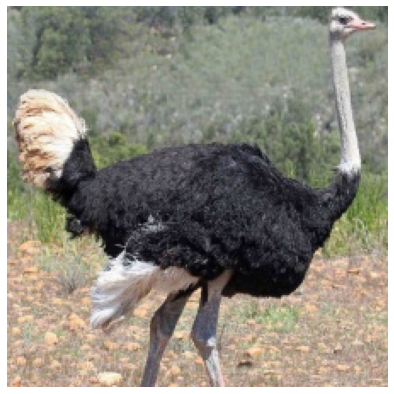

In [4]:
import numpy as np
import os
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Вичитуємо та зберігаємо зображення та їх мітки
def read_and_save(root_folder):
    imgs = []
    folders = []
    for folder in os.listdir(root_folder):
        for img_path in os.listdir(os.path.join(root_folder, folder)):
            img = Image.open(os.path.join(root_folder, folder, img_path))
            img = np.array(img)
            img = img.astype('float32')
            img /= 255.0
            imgs.append(img)
            folders.append(folder)
    # Відновлюємо мітку класу по папці, у якій зберігається зображення      
    folders_dict = {key: i for i, key in enumerate(np.unique(folders))}
    labels = [folders_dict[folders[i]] for i in range(len(folders))]
    label_vectors = np.zeros((len(labels), 5))
    for i in range(len(labels)):
        label_vectors[i][labels[i]] = 1
    
    return np.array(imgs), np.array(label_vectors)
# Створюємо навчальну та тестову вибірки
Xtrain, Ytrain = read_and_save('birds/train/')
Xtrain, Ytrain = shuffle(Xtrain, Ytrain)
Xtest, Ytest = read_and_save('birds/test/')
Xtest, Ytest = shuffle(Xtest, Ytest)
# Знаходимо по одному екземпляру з кожного з классів
example = [Xtrain[np.where(Ytrain.T[i] == 1)][0] for i in range(5)]
# Виводимо зображення
for i in range(5):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    example[i] *= 255
    example[i] = example[i].astype('uint8')
    plt.imshow(example[i])
    plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Будуємо модель
model = Sequential([Conv2D(20, 3, activation='relu', input_shape=(224, 224, 3)),
                    MaxPooling2D(2, 2),
                    Conv2D(40, 5, activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(60, 7, activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(80, 9, activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.3),
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(5, activation='softmax')])
model.summary()
# Компілюємо побудовану модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Тренеруємо модель
model.fit(Xtrain, Ytrain, epochs=17)
# Оцінюємо точність на тестовій виборці
loss, accuracy = model.evaluate(Xtest, Ytest)
print('Точніть: %.2f' % (accuracy*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 20)      560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 20)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 40)      20040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 60)        117660    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 80)       

## Рекурентні мережі

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Імпортуємо текст і робимо трейн та тест вибірки
pd.set_option('max_colwidth', 400)
corpus = pd.read_csv('Sheet.csv')
corpus = corpus.iloc[0:None, 1:3]
allX = corpus['resume_text'].values
allY = np.array([1 if (v == 'flagged') else 0 for v in corpus['class'].values])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(allX, allY, test_size=0.2, random_state=2)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocabulary_length = 3000
pad = 4
# Токенізуємо тексти
tokenizer = Tokenizer(vocabulary_length)
tokenizer.fit_on_texts(allX)
# Робимо довжину кожного з токенізованих текстів однаковою
Xtrain = pad_sequences(tokenizer.texts_to_sequences(Xtrain), pad)
Xtest = pad_sequences(tokenizer.texts_to_sequences(Xtest), pad)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Dropout

# Будуємо модель
model = Sequential([Embedding(vocabulary_length, 20, input_length=pad),
                    SimpleRNN(50, return_sequences=True, dropout=0.3),
                    SimpleRNN(100, return_sequences=True, dropout=0.5),
                    Dense(1, activation='sigmoid')])
model.summary()
# Компілюємо побудовану модель
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Тренеруємо модель
model.fit(Xtrain, Ytrain, epochs=7)
# Оцінюємо точність на тестовій виборці
loss, accuracy = model.evaluate(Xtest, Ytest)
print('Точніть: %.2f' % (accuracy*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 20)             60000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 4, 50)             3550      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 4, 100)            15100     
_________________________________________________________________
dense_5 (Dense)              (None, 4, 1)              101       
Total params: 78,751
Trainable params: 78,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
4/4 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5471
Epoch 2/7
4/4 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6644
Epoch 3/7
4/4 [==============================] - 0s 2ms/st